In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
import cv2
import gc
import os

In [4]:
!pip install opencv-python


In [5]:
import cv2
import gc
import os

In [6]:
!pip install tensorflow


In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import layers


In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import os
print(os.getcwd())


C:\Users\Harsh\Machine Learning\Lung Cancer Detection


In [10]:
#Path for DV
path = './lung_colon_image_set/lung_image_sets'
classes = os.listdir(path)
classes


['lung_aca', 'lung_n', 'lung_scc']

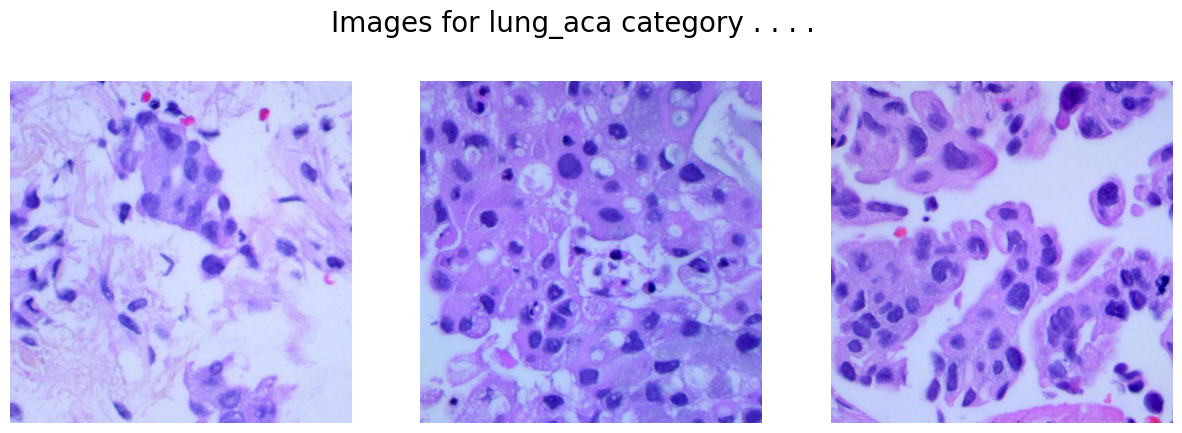

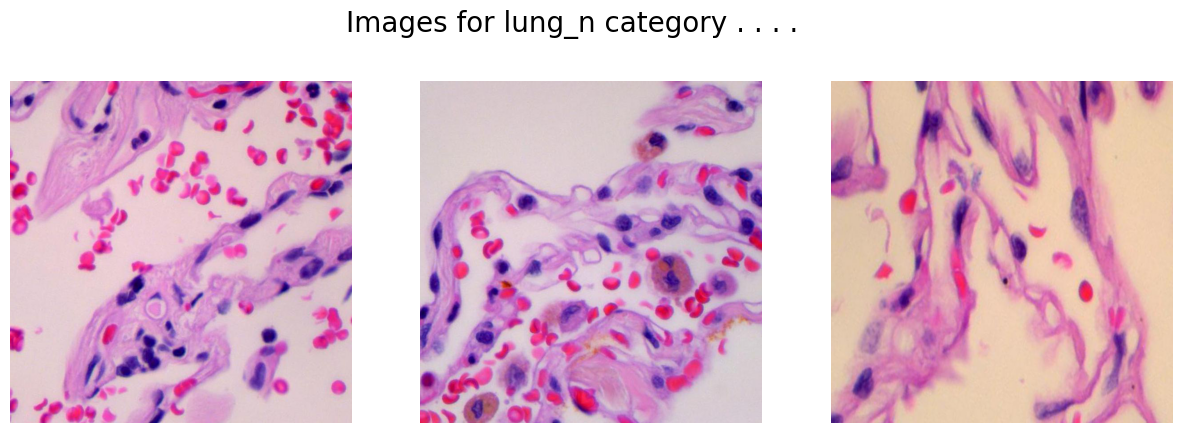

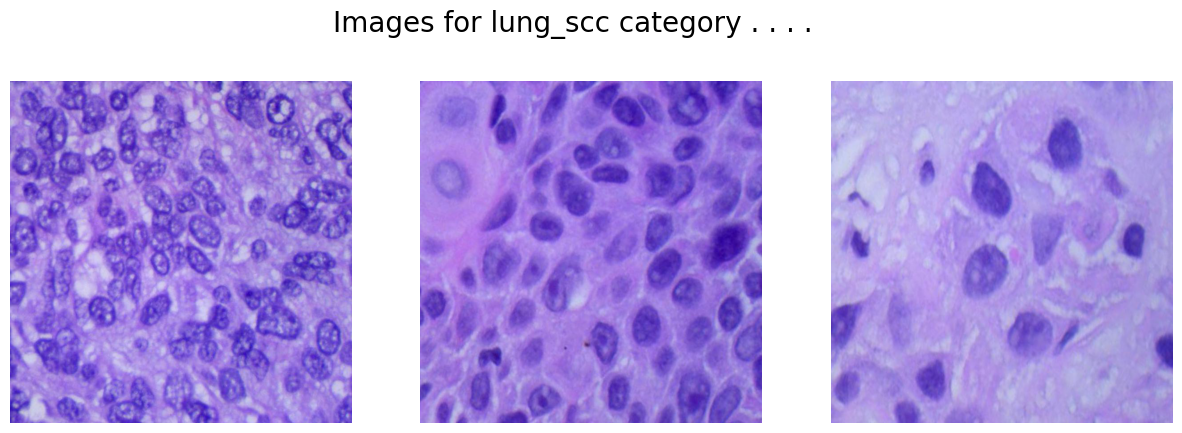

In [11]:
for cat in classes:
    image_dir = path+"/"+cat
    if not os.path.exists(image_dir):
        print(f"The directory {image_dir} does not exist.")
    else:
        images = os.listdir(image_dir)

        fig, ax = plt.subplots(1, 3, figsize=(15, 5))
        fig.suptitle(f'Images for {cat} category . . . .', fontsize=20)

        for i in range(3):
            k = np.random.randint(0, len(images))
            img = np.array(Image.open(os.path.join(image_dir, images[k])))
            ax[i].imshow(img)
            ax[i].axis('off')

        plt.show()


In [12]:
#Data Prep for Train
IMG_SIZE = 256
SPLIT = 0.2
EPOCHS = 15
BATCH_SIZE = 64


In [13]:
X = []
Y = []

for i, cat in enumerate(classes):
    images = glob(f'{path}/{cat}/*.jpeg')

    for image in images:
        img = cv2.imread(image)
    
        X.append(cv2.resize(img, (IMG_SIZE, IMG_SIZE)))
        Y.append(i)

X = np.asarray(X)
one_hot_encoded_Y = pd.get_dummies(Y).values


In [14]:
X_train, X_val, Y_train, Y_val = train_test_split(X, one_hot_encoded_Y,
                                                test_size = SPLIT,
                                                random_state = 2022)
print(X_train.shape, X_val.shape)


(12000, 256, 256, 3) (3000, 256, 256, 3)


In [15]:
model = keras.models.Sequential([
    layers.Conv2D(filters=32,
                  kernel_size=(5, 5),
                  activation='gelu',
                  input_shape=(IMG_SIZE,
                               IMG_SIZE,
                               3),
                  padding='same'),
    layers.MaxPooling2D(2, 2),
 
    layers.Conv2D(filters=64,
                  kernel_size=(3, 3),
                  activation='gelu',
                  padding='same'),
    layers.MaxPooling2D(2, 2),
 
    layers.Conv2D(filters=128,
                  kernel_size=(3, 3),
                  activation='gelu',
                  padding='same'),
    layers.MaxPooling2D(2, 2),
 
    layers.Flatten(),
    layers.Dense(256, activation='gelu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='gelu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(3, activation='softmax')
])

In [16]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 128)       0

In [ ]:
conda install pydot

In [ ]:
conda install pydotplus

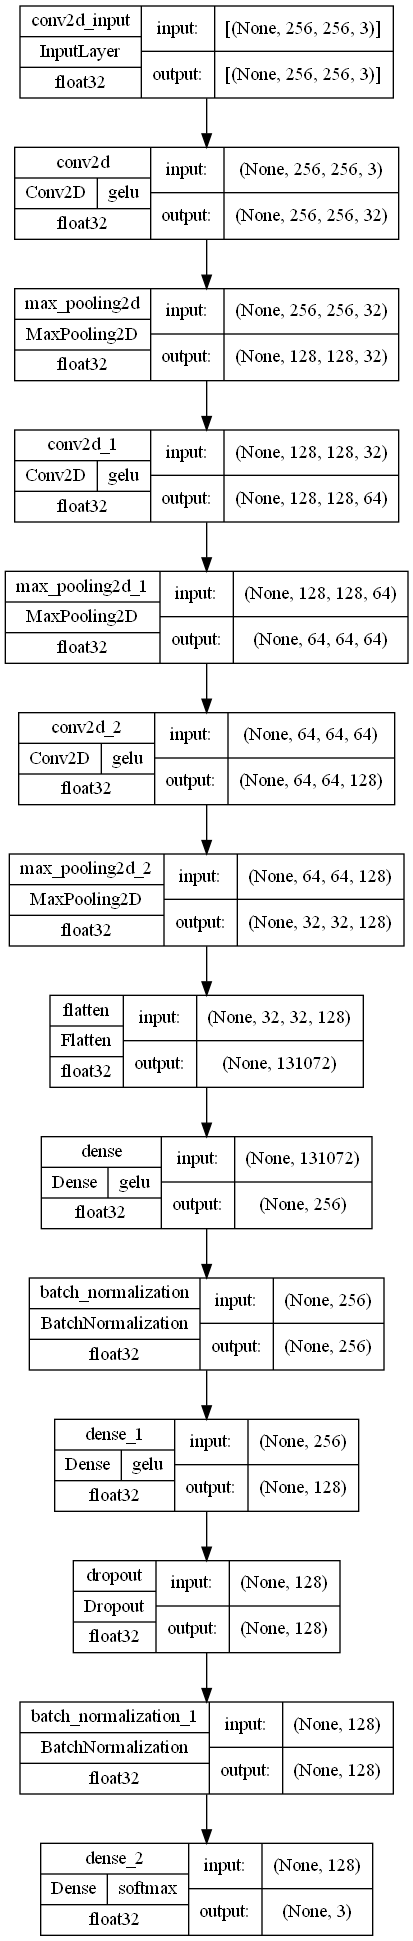

In [20]:
keras.utils.plot_model(
    model,
    show_shapes = True,
    show_dtype = True,
    show_layer_activations = True
)


In [21]:
 model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [22]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
 
 
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') > 0.90:
            print('\n Validation accuracy has reached upto \
                      90% so, stopping further training.')
            self.model.stop_training = True
 
 
es = EarlyStopping(patience=3,
                   monitor='val_accuracy',
                   restore_best_weights=True)
 
lr = ReduceLROnPlateau(monitor='val_loss',
                       patience=2,
                       factor=0.5,
                       verbose=1)

In [23]:
#now we train our model
history = model.fit(X_train, Y_train,
                    validation_data = (X_val, Y_val),
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS,
                    verbose = 1,
                    callbacks = [es, lr, myCallback()])

Epoch 1/15


188/188 [==============================] - 1497s 7s/step - loss: 0.3360 - accuracy: 0.8633 - val_loss: 62.2909 - val_accuracy: 0.3453 - lr: 0.0010
Epoch 2/15
188/188 [==============================] - 1150s 6s/step - loss: 0.2741 - accuracy: 0.8907 - val_loss: 36.2239 - val_accuracy: 0.3257 - lr: 0.0010
Epoch 3/15
188/188 [==============================] - 1142s 6s/step - loss: 0.2118 - accuracy: 0.9130 - val_loss: 14.2434 - val_accuracy: 0.3257 - lr: 0.0010
Epoch 4/15
188/188 [==============================] - 1227s 6s/step - loss: 0.1619 - accuracy: 0.9358 - val_loss: 2.6030 - val_accuracy: 0.6233 - lr: 0.0010
Epoch 5/15
188/188 [==============================] - 1401s 7s/step - loss: 0.1206 - accuracy: 0.9529 - val_loss: 1.7381 - val_accuracy: 0.6717 - lr: 0.0010
Epoch 6/15
188/188 [==============================] - 1039s 6s/step - loss: 0.1010 - accuracy: 0.9615 - val_loss: 1.6627 - val_accuracy: 0.7283 - lr: 0.0010
Epoch 7/15
188/188 [==============================] -

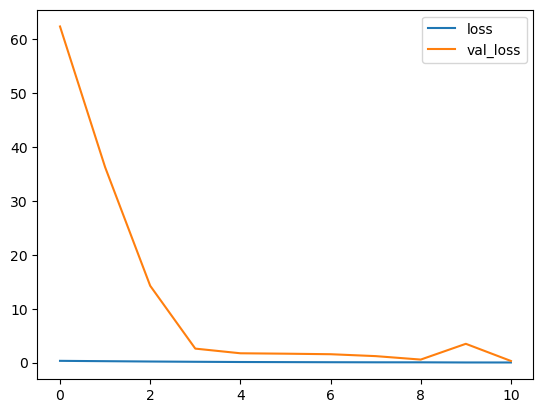

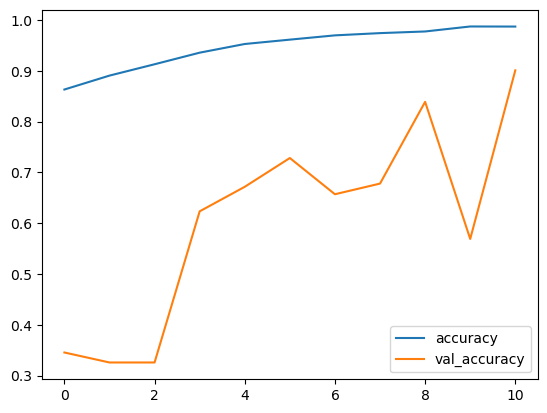

In [24]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['accuracy','val_accuracy']].plot()
plt.show()

In [25]:
Y_pred = model.predict(X_val)
Y_val = np.argmax(Y_val, axis=1)
Y_pred = np.argmax(Y_pred, axis=1)

94/94 [==============================] - 59s 588ms/step


In [26]:
metrics.confusion_matrix(Y_val, Y_pred)

array([[846,   8, 133],
       [ 93, 884,   0],
       [ 63,   0, 973]], dtype=int64)

In [27]:
print(metrics.classification_report(Y_val, Y_pred,
                                    target_names=classes))

              precision    recall  f1-score   support

    lung_aca       0.84      0.86      0.85       987
      lung_n       0.99      0.90      0.95       977
    lung_scc       0.88      0.94      0.91      1036

    accuracy                           0.90      3000
   macro avg       0.91      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000



In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 128)       0